In [57]:
import numpy as np
import matplotlib.pyplot as plt 
import random                          # crear numeros aleatoriamente
import scipy.io as sio
from sklearn.model_selection import train_test_split


In [58]:
def datos(data):
    """
    data: es el archivo.mat para leer todos los datos
    D_entre: Salida que retorna la cantidad de datos de entrenamiento 
    D_prueba: Salida que retorna la cantidad de datos de prueba
    D_val: Salida que retorna la cantidad de datos de Validacion
    """
    
    #Extrayendo matriz de caracteristicas 
    Xi = data['x']

    #Extrayendo dato esperado (Clases)
    Yi = data['y']

    #Agregando el bias a las filas de la matriz de caracteristicas (Entradas)
    bias = np.full((Xi.shape[0], 1), 1)
    Xi = np.hstack((bias, Xi))

    #numero de datos
    num_datos = Xi.shape[0]

    #numero de caracteristicas
    caract = Xi.shape[1]-1                  # Se resta el bias 

    #Datos de entrenamiento y prueba: entrenamiento 90% , prueba 10%
    X_ent, X_pru, Y_ent, Y_pru = train_test_split(Xi, Yi, test_size=0.1)

    #Obteniendo datos de validacion: Validacion 10% y Entrenamiento 80%
    #Se extraen los datos de validación a partir de los de entrenamiento
    X_ent, X_val, Y_ent, Y_val = train_test_split(X_ent, Y_ent, test_size=0.1, random_state=42)

    #Obteniendo datos de entrenamiento y prueba
    D_entre  =  len(X_ent)       # datos de entrenamiento   (verificar la cantidad de dtos para hacer la particion)
    D_prueba =  len(X_pru)       #Datos de validacion 
    D_val    =  len(X_val)

    print("Cantidad de datos del dataset: ", Xi.shape)
    print("Cantidad de datos de entrenamiento:",D_entre)
    print("Cantidad de datos de prueba:",D_prueba)
    print("Cantidad de datos de Validación:", D_val)
    
    #se grafica la distribución de los datos
    plot_datos(Xi,Yi,X_ent,Y_ent,X_pru,Y_pru,X_val,Y_val)
    
    return Xi,Yi,X_ent, Y_ent, D_entre,X_pru,Y_pru, D_prueba,X_val, Y_val, D_val

In [59]:
def plot_datos(Xi,Yi,X_ent,Y_ent,X_pru,Y_pru,X_val,Y_val):
    
    # Crear la figura y los subplots
    fig, axs = plt.subplots(2, 2, figsize=(14, 14))

    # Graficar la segunda gráfica en el segundo subplot
    axs[0, 0].scatter(Xi[:, 1], Xi[:, 2], c=Yi, cmap=plt.cm.coolwarm)
    axs[0, 0].set_title('Datos Originales', fontsize=18)
    axs[0, 0].set_xlabel('X1', fontsize=14)
    axs[0, 0].set_ylabel('X2', fontsize=14)

    # Graficar la primera gráfica en el primer subplot
    axs[0, 1].scatter(X_ent[:, 1], X_ent[:, 2], c=Y_ent, cmap=plt.cm.coolwarm)
    axs[0, 1].set_title('Datos de Entrenamiento', fontsize=18)
    axs[0, 1].set_xlabel('X1', fontsize=14)
    axs[0, 1].set_ylabel('X2', fontsize=14)

    # Graficar la tercera gráfica en el tercer subplot
    axs[1, 0].scatter(X_pru[:, 1], X_pru[:, 2], c=Y_pru, cmap=plt.cm.coolwarm)
    axs[1, 0].set_title('Datos de Prueba', fontsize=18)
    axs[1, 0].set_xlabel('X1', fontsize=14)
    axs[1, 0].set_ylabel('X2', fontsize=14)

    # Graficar la cuarta gráfica en el cuarto subplot
    axs[1, 1].scatter(X_val[:, 1], X_val[:, 2], c=Y_val, cmap=plt.cm.coolwarm)
    axs[1, 1].set_title('Datos de Validación', fontsize=18)
    axs[1, 1].set_xlabel('X1', fontsize=14)
    axs[1, 1].set_ylabel('X2', fontsize=14)

    # Mostrar la figura
    plt.show()


In [60]:
def Calculo_error(x,y,w,n):
    """
    X: Features vector 
    Y: Label output 
    w: Weight vector 
    n: Data length 
    """
    
    suma = 0                               # Cont. that storage the errors 
    
    for i in range (n):
        g = np.dot(np.transpose(w), x[i])  # Internal State of Neuron 

        if g < 0:                          # Umbral for classification in the LMS Algorithm
            g = -1
        else:
            g = 1

        if g != y[i]:                      # CError condition
            suma = suma + 1                # Cont. Error

    error_pct = 100.0 * suma / n           # Porcentual error
    
    return error_pct

In [61]:
def LMS_Algorihtm(u,num_iter, Xi,Yi, X_ent, Y_ent, D_entre,X_pru,Y_pru, D_prueba,X_val, Y_val, D_val):

    #Definicion de los pesos aleatoriamente

    Wk = []  #Definicion de pesos 

    for i in range(Xi.shape[1]):                      # ciclo para agregar los numeros aleatorios con los que se inicializaran los pesos
        Wk.append(random.uniform(0,1))                # vector de pesos extendido
    print("Wo: ", Wk )


    #Definicion de errores 
    Emin = 10        #Error minimo de parada
    V_errorEnt = [] # Vector que almacena los errores de entrenamiento
    V_errorPru = [] # Vector que almacena los errores de prueba


    # Definicion de  parametros del algoritmo      
    e = 0            # Error de correccion
    error_ent = []   # Vector para guardar los errores 
    suma=0           # Acumulador de errores
    iteraciones = 0  # Contador de iteraciones
    
    #u = 0.1          # Taza de aprendizaje
    gamma = 1.05
    beta =  1.04
    alpha = 0.7

    while( (iteraciones< num_iter)):

        ################## Error de entrenamiento  ###########################
        i = np.random.randint(0,D_entre)
        #print("iteraciones =",iteraciones,"\n")
        Y = Y_ent[i][0]
        g = np.dot(np.transpose(Wk),X_ent[i]) #Funcion interna de la neurona. matmul permite multiplicar dos matrices
        #print("g: ", g)
        e = (g - Y)  #Error entre la salida dada y la salida esperada 
        #print("error:",e)

        error_ent.append(e)

        ############## Calculo de taza aprendizaje ####################
        if( (error_ent[iteraciones]/error_ent[iteraciones-1])>beta):
            u = u*alpha
        elif(error_ent[iteraciones]<error_ent[iteraciones-1]):
            u = u*gamma

        #print("Peso Wk: ", Wk , "\n")
        Eent  = Calculo_error(X_ent,Y_ent,Wk,D_entre)
        V_errorEnt.append(Eent) 
        #print("Error de entrenamiento: ", Eent )
        Epru  = Calculo_error(X_pru,Y_pru,Wk,D_prueba)
        V_errorPru.append(Epru)
        #print("Error de Prueba: ",  Epru )


        Wk = Wk - e*u*X_ent[i]    #np.dot(value,Xi[i]) #Encuentro los nuevos valores de los pesos utilziando np.dot para multiplicar const * matriz

        iteraciones = iteraciones + 1;

    return Wk,V_errorEnt, V_errorPru,

# Dataset 1 

Cantidad de datos del dataset:  (400, 3)
Cantidad de datos de entrenamiento: 324
Cantidad de datos de prueba: 40
Cantidad de datos de Validación: 36


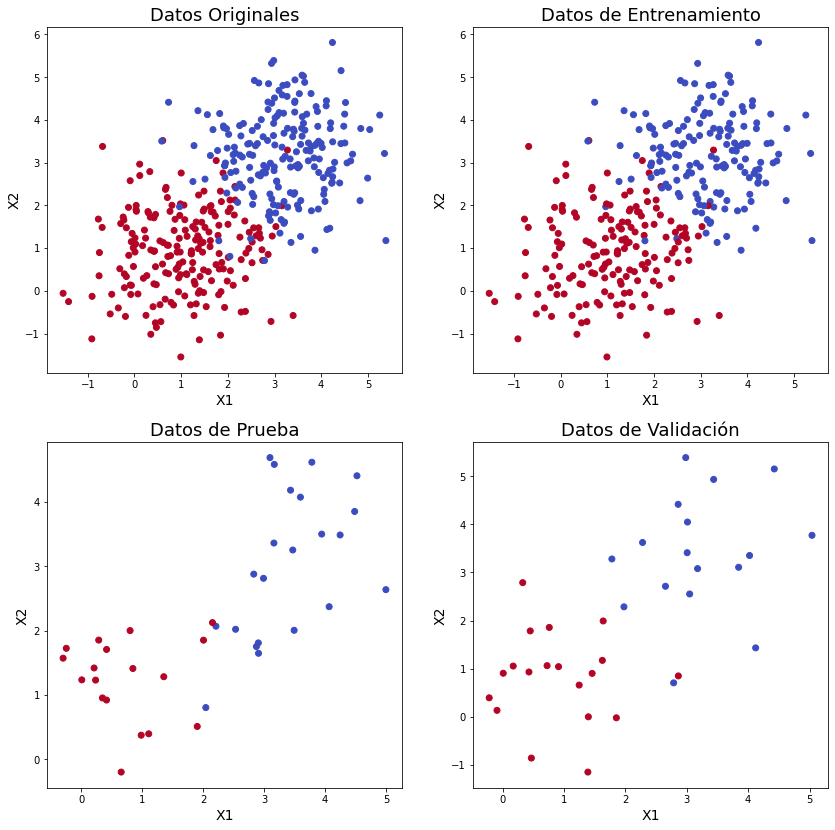

In [62]:
data = sio.loadmat('Tiosulfatosodio.mat') # cargar el archivo .mat
Xi,Yi,X_ent, Y_ent, D_entre,X_pru,Y_pru, D_prueba,X_val, Y_val, D_val = datos(data)

In [63]:
u=0.1
num_iter=1000
Wk,V_errorEnt, V_errorPru = LMS_Algorihtm(u,num_iter, Xi,Yi,X_ent, Y_ent, D_entre,X_pru,Y_pru, D_prueba,X_val, Y_val, D_val)

Wo:  [0.7154531036321133, 0.9833397472411705, 0.39064700407745734]


In [64]:
##################  Comparación de los errores  ###########
Eent  = Calculo_error(X_ent,Y_ent,Wk,D_entre)
print("Error de entrenamiento: ", np.round(Eent,4))
Epru  = Calculo_error(X_pru,Y_pru,Wk,D_prueba)
print("Error de Prueba: ",  np.round(Epru,4) )
Eval = Calculo_error(X_val,Y_val,Wk,D_val)
print("Error de validación: ",  np.round(Eval,4) )

Error de entrenamiento:  12.963
Error de Prueba:  12.5
Error de validación:  13.8889


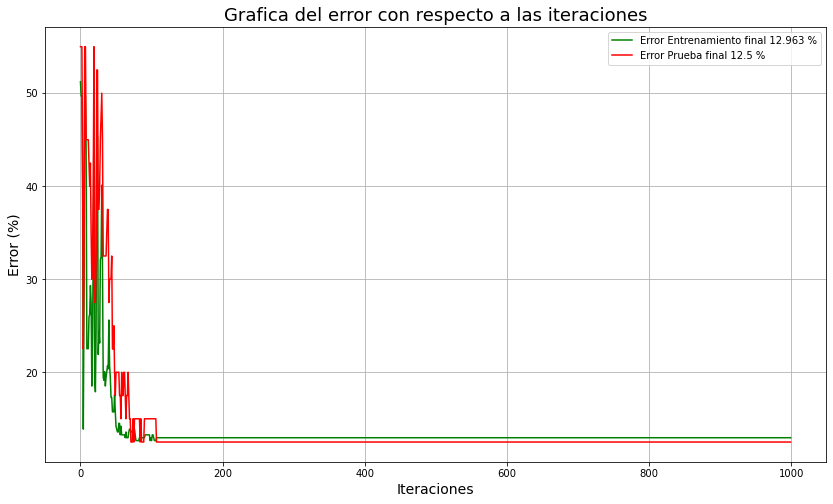

In [65]:
plt.figure(figsize=(14,8))
plt.title(label="Grafica del error con respecto a las iteraciones",fontsize=18)
plt.plot(V_errorEnt , 'g' ,label = f"Error Entrenamiento final {round(Eent,4)} %")
plt.plot(V_errorPru, 'r' , label = f"Error Prueba final {round(Epru,4)} %")
plt.legend()
plt.xlabel('Iteraciones',fontsize=14)
plt.ylabel('Error (%)',fontsize=14)
plt.grid()

# Dataset 2

Cantidad de datos del dataset:  (600, 3)
Cantidad de datos de entrenamiento: 486
Cantidad de datos de prueba: 60
Cantidad de datos de Validación: 54


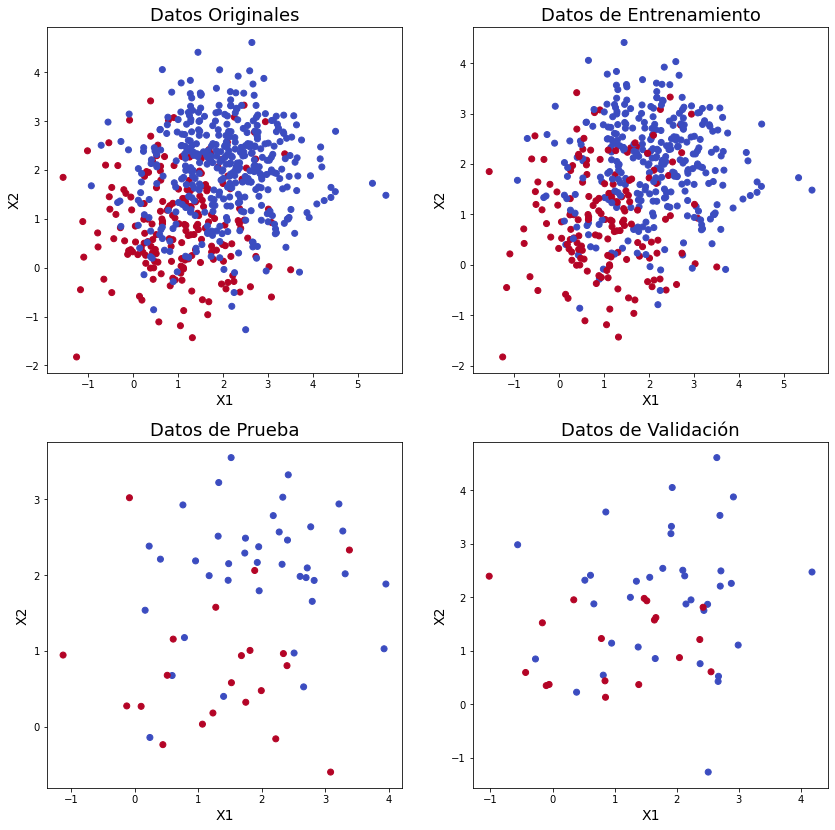

In [66]:
data = sio.loadmat('esterificacion.mat') # cargar el archivo .mat
Xi,Yi,X_ent, Y_ent, D_entre,X_pru,Y_pru, D_prueba,X_val, Y_val, D_val = datos(data)

In [67]:
u=0.07
num_iter= 2000

Wk,V_errorEnt, V_errorPru = LMS_Algorihtm(u,num_iter, Xi,Yi,X_ent, Y_ent, D_entre,X_pru,Y_pru, D_prueba,X_val, Y_val, D_val)

Wo:  [0.7252774529880124, 0.022045214653668044, 0.45849236521407655]


In [68]:
##################  Comparación de los errores  ###########
Eent  = Calculo_error(X_ent,Y_ent,Wk,D_entre)
print("Error de entrenamiento: ", np.round(Eent,4))
Epru  = Calculo_error(X_pru,Y_pru,Wk,D_prueba)
print("Error de Prueba: ",  np.round(Epru,4) )
Eval = Calculo_error(X_val,Y_val,Wk,D_val)
print("Error de validación: ",  np.round(Eval,4) )

Error de entrenamiento:  23.6626
Error de Prueba:  28.3333
Error de validación:  25.9259


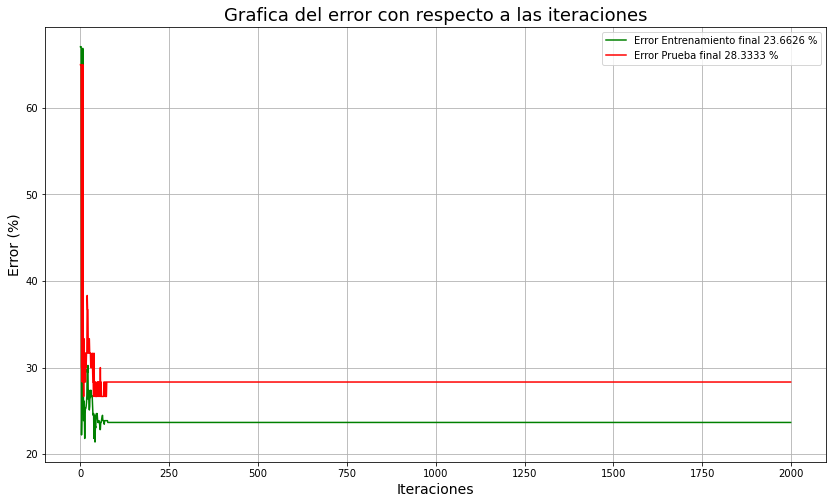

In [69]:
plt.figure(figsize=(14,8))
plt.title(label="Grafica del error con respecto a las iteraciones",fontsize=18)
plt.plot(V_errorEnt , 'g' ,label = f"Error Entrenamiento final {round(Eent,4)} %")
plt.plot(V_errorPru, 'r' , label = f"Error Prueba final {round(Epru,4)} %")
plt.legend()
plt.xlabel('Iteraciones',fontsize=14)
plt.ylabel('Error (%)',fontsize=14)
plt.grid()